Q1. 

According to Bayes theorem, $P(\theta|x) = \frac{P(x|\theta) P(\theta)}{P(x)}$

where:
- $P(\theta|x)$ represents the posterior distribution
- $P(x|\theta)$ represents likelihood
- $P(\theta)$ represents prior
- $P(x)$ represents evidence

As we set $P(\theta)$ as a probability of passing the class and $P(x)$ probability of answering quickly, 

- $P(\theta) = 0.9$: a probability of passing the class 
- $P(x|\theta) = 0.6$: a probability of answering quickly given passing the class 
- $P(\theta') = 1-0.9 = 0.1$: a probability of not answering quickly 
- $P(x|\theta') = 0.3$: a probabilyt of answering quickly given not passing the class 

By using the law of total probability, 
$$ P(x) = P(x|\theta)P(\theta) + P(x|\theta')P(\theta') = 0.6*0.9 + 0.3*0.1 = 0.57$$

Then, by using the Bayes theorem, we can calcuate $P(\theta|x) = \frac{0.6*0.9}{0.57} \approx 0.9474$

So the 94.47% of students who have answered quickly will pass the class 

Q2. 

For the likelihood as a multinomial distribution, the function can be written as 

$$
P(X_1 = x_1, X_2 = x_2, \dots, X_k = x_k|\theta, n) = \frac{n!}{x_1! x_2! \cdots x_k!} \theta_1^{x_1} \theta_2^{x_2} \cdots \theta_k^{x_k}
$$

Where:
- $n$: Total number of trials.
- $X_i$: Count of outcomes in the i-th category.
- $\theta_i$: Probability of the i-th category.
- $ x_1 + x_2 + \cdots + x_k = n $

For the prior as Dirichlet Distribution, the function can be written as 

$$P(\theta_1, \theta_2, \dots, \theta_k \mid \alpha_1, \alpha_2, \dots, \alpha_k) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1) \Gamma(\alpha_2) \cdots \Gamma(\alpha_k)} \theta_1^{\alpha_1 - 1} \theta_2^{\alpha_2 - 1} \cdots \theta_k^{\alpha_k - 1}
$$

Where:
- $ \alpha_0 = \sum_{i=1}^k \alpha_i $
- $ \Gamma(\cdot) $: Gamma function, a generalization of the factorial.
- $ \theta_i \geq 0 $ for all $i$, and $\sum_{i=1}^k \theta_i = 1$

*Note: $\alpha_i$ is a prior evidence about a likelihood of category $i$

Since the prior is Dirichlet distribution, the posterior distribution also follows Dirichlet distribution due to the conjugacy. According to Bayes theorem, the posterior distibution can be expressed as 

$$P(\theta|X,\alpha) = \frac{1}{B(\alpha + X)} \prod_{i=1}^k \theta_i^{\alpha_i + x_i - 1}= Dirichlet(\alpha_1+x_1, \alpha_2+x_2, \cdots, \alpha_k+x_k)$$

*Note: $P(\theta \mid X, \alpha) \propto \prod_{i=1}^k \theta_i^{\alpha_i + x_i - 1}$
 
where:

$$B(\alpha + X) = \frac{\prod_{i=1}^k \Gamma(\alpha_i + x_i)}{\Gamma\left(\sum_{i=1}^k (\alpha_i + x_i)\right)}
$$ 
*Note: $B(\alpha + X)$ ensures the sum of $\theta$ to be 1 as it works as a normalization constant

Thus, the posterior distribution follows Dirichlet distribution and $\alpha_i+x_i$ represents the sum of constribution from prior and observed data

Q3.

A random sampling from a multinomial distributio with 100 trials and probability of 0.5, 0.3 and 0.2 is examined. 
As a result, Sample counts show 50, 25 and 25 accordingly.

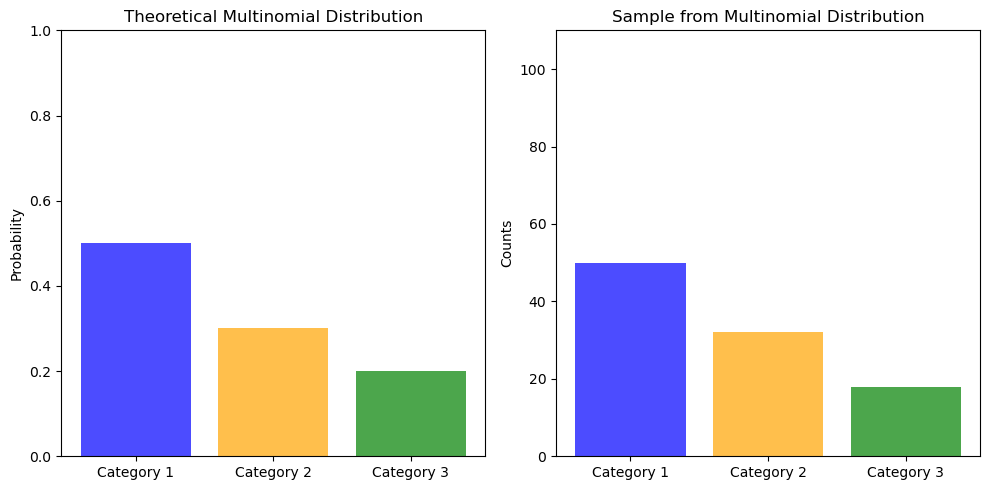

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the multinomial distribution
n_trials = 100  # Number of trials
p = [0.5, 0.3, 0.2]  # Probabilities for the three categories

# Generate a single sample from the multinomial distribution
sample = np.random.multinomial(n_trials, p)

# Visualization
categories = ['Category 1', 'Category 2', 'Category 3']

# Plot the multinomial distribution (theoretical probabilities)
plt.figure(figsize=(10, 5))

# Theoretical multinomial distribution
plt.subplot(1, 2, 1)
plt.bar(categories, p, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title("Theoretical Multinomial Distribution")
plt.ylabel("Probability")
plt.ylim(0, 1)

# Plot the multinomial sample (observed counts)
plt.subplot(1, 2, 2)
plt.bar(categories, sample, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title("Sample from Multinomial Distribution")
plt.ylabel("Counts")
plt.ylim(0, n_trials + 10)

# Show the plots
plt.tight_layout()
plt.show()


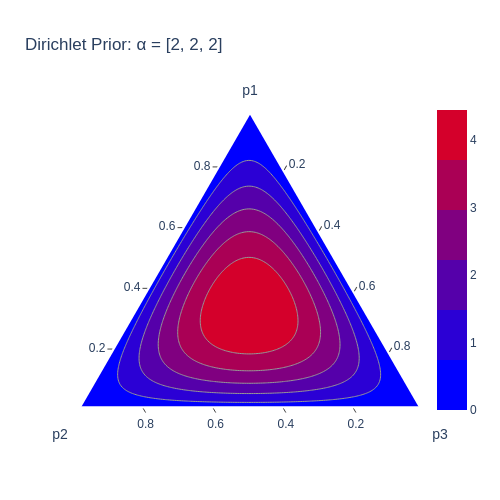

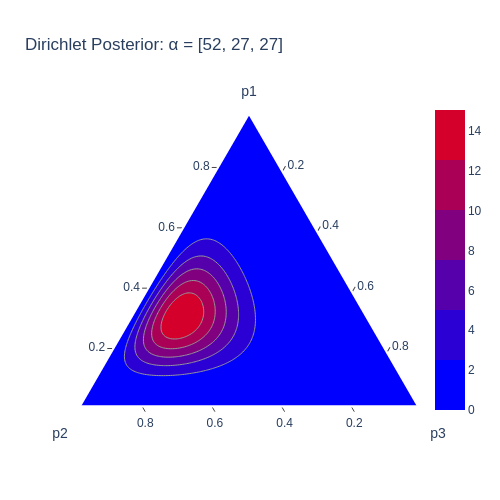

In [2]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff

# Generate points on the simplex
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Filter out points where any p_i < 0 (due to numerical precision issues)
p = p[(p >= 0).all(axis=1)]

# Prior and Posterior Parameters
alpha_prior = np.array([2, 2, 2])  # Prior alpha values
alpha_posterior = np.array([5, 8, 3])  # Posterior alpha values

# Compute Dirichlet PDFs for the prior and posterior
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
prior_densities = dirichlet_prior.pdf(p.T)
posterior_densities = dirichlet_posterior.pdf(p.T)

# Create Ternary Contour Plot for the Prior
fig_prior = ff.create_ternary_contour(
    p.T, prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_prior.update_layout(title="Dirichlet Prior: α = [2, 2, 2]")

# Create Ternary Contour Plot for the Posterior
fig_posterior = ff.create_ternary_contour(
    p.T, posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig_posterior.update_layout(title="Dirichlet Posterior: α = [52, 27, 27]")

# Display the Plots
fig_prior.show("png")
fig_posterior.show("png")


The simplex Dirichlet distribution of prior and posterior is visulaized as above. 
Notice that two ternary plots shows different density, and Posterior represents much more skewed density. it is because the sample with 50, 25 and 25 bias the probabilty density where prior is (2,2,2)

*Note: The $\alpha$ values for each category are set as 2, and a new parameter $\alpha + x$ are calculated as 52, 27 and 27 accordingly 